# 1 - Qual é o impacto das avaliações negativas na probabilidade de um produto ser vendido novamente?

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install matplotlib seaborn

In [34]:
df_avaliacao = pd.read_csv(r'C:\Users\55119\OneDrive\Área de Trabalho\REPROGRAMA (On33)\Semana14\on33-python-s14-analise-de-dados\material\dados\olist_order_reviews_dataset.csv')
df_avaliacao.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [35]:
df_pedidos = pd.read_csv(r'C:\Users\55119\OneDrive\Área de Trabalho\REPROGRAMA (On33)\Semana14\on33-python-s14-analise-de-dados\material\dados\olist_orders_dataset.csv')
df_pedidos.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [36]:
df_itens_pedido = pd.read_csv(r'C:\Users\55119\OneDrive\Área de Trabalho\REPROGRAMA (On33)\Semana14\on33-python-s14-analise-de-dados\material\dados\olist_order_items_dataset.csv')
df_itens_pedido.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [37]:
df_produtos = pd.read_csv(r'C:\Users\55119\OneDrive\Área de Trabalho\REPROGRAMA (On33)\Semana14\on33-python-s14-analise-de-dados\material\dados\olist_products_dataset.csv')
df_produtos.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [103]:
df_historico_vendas = pd.read_csv(r'C:\Users\55119\OneDrive\Área de Trabalho\REPROGRAMA (On33)\Semana14\on33-python-s14-analise-de-dados\material\dados\olist_order_payments_dataset.csv')
df_historico_vendas.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
df_avaliacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [9]:
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [10]:
# Converter o tipo da coluna para datetime
df_avaliacao['review_answer_timestamp'] = pd.to_datetime(df_avaliacao['review_answer_timestamp'])
df_pedidos['order_purchase_timestamp'] = pd.to_datetime(df_pedidos['order_purchase_timestamp'])

In [11]:
df_pedidos.info()
df_avaliacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype    

In [12]:
df_avaliacao.describe()

,review_score,review_answer_timestamp
count,99224.000000,99224
mean,4.086421,2018-01-16 00:23:56.977938688
min,1.000000,2016-10-07 18:32:28
25%,4.000000,2017-09-27 01:53:27.249999872
50%,5.000000,2018-02-04 22:41:47.500000
75%,5.000000,2018-05-20 12:11:21.500000
max,5.000000,2018-10-29 12:27:35
std,1.347579,NaN


In [13]:
df_pedidos.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,NaN,9,47,3,522
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2016-09-04 21:15:19,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2017-09-12 14:46:19,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2018-01-18 23:04:36,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2018-05-04 15:42:16,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,2018-10-17 17:30:18,NaN,NaN,NaN,NaN


In [14]:
# Verificar colunas
df_avaliacao.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [15]:
df_produtos.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [16]:
df_itens_pedido.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [17]:
df_pedidos.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [33]:
df_historico_vendas.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [19]:
print(df_avaliacao.isnull().sum())
print(df_pedidos.isnull().sum())

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [44]:
# Juntar as bases de dados
dados_juntos = df_avaliacao.merge(df_pedidos, on='order_id')
dados_juntos = dados_juntos.merge(df_itens_pedido, on='order_id')
dados_juntos = dados_juntos.merge(df_historico_vendas, on='order_id')
dados_juntos = dados_juntos.merge(df_produtos, on='product_id')

In [43]:
dados_juntos.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [49]:
# Apagar colunas 
apagar_colunas = ['product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'order_status','review_answer_timestamp',
       'order_approved_at','order_delivered_carrier_date']
dados_juntos = dados_juntos.drop(apagar_colunas, axis=1)

In [50]:
dados_juntos.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date', 'customer_id',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value'],
      dtype='object')

In [51]:
# Filtrar para obter as avaliações negativas (suponha que uma avaliação negativa é <= 3)
avaliacoes_negativas = dados_juntos[dados_juntos['review_score'] <= 3]

In [52]:
# Adicionar uma coluna indicando se o produto foi vendido novamente
dados_juntos['vendido_novamente'] = dados_juntos.groupby('product_id')['order_id'].transform('count') > 1

In [102]:
# Filtrar para obter as avaliações negativas (suponha que uma avaliação negativa é <= 3)
avaliacoes_negativas = dados_juntos[dados_juntos['review_score'] <= 3]

# Calcular a taxa de produtos vendidos novamente com avaliações negativas
total_negativas = len(avaliacoes_negativas)
comentario_negativo = avaliacoes_negativas['vendido_novamente'].sum()

if total_negativas > 0:
    probabilidade_negativa_revenda = comentario_negativo / total_negativas
else:
    probabilidade_negativa_revenda = 0

# Calcular a taxa geral de produtos vendidos novamente
total_produtos = len(dados_juntos)
total_nova_venda = dados_juntos['vendido_novamente'].sum()

if total_produtos > 0:
    total_probabilidade_negativa_revenda = total_nova_venda / total_produtos
else:
    total_probabilidade_negativa_revenda = 0

print(f'Probabilidade de um produto ser vendido novamente com avaliação negativa: {probabilidade_negativa_revenda:.2f}')
print(f'Probabilidade geral de um produto ser vendido novamente: {total_probabilidade_negativa_revenda:.2f}')

Probabilidade de um produto ser vendido novamente com avaliação negativa: 0.86
Probabilidade geral de um produto ser vendido novamente: 0.85


### Conforme a análise, podemos observar que é alta a probabilidade de novas compras mesmo o produto tendo avaliações negativas

C:\Users\55119\AppData\Local\Temp\ipykernel_16280\2732809668.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipos, y=probabilidade, palette='Blues_d')


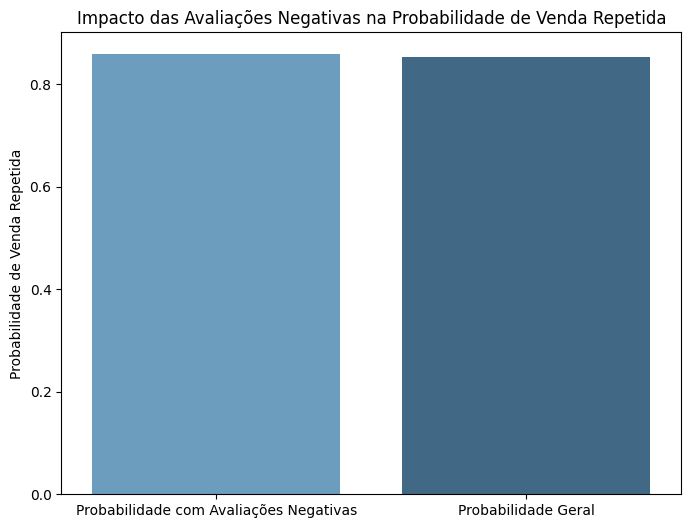

In [98]:
# Criar o gráfico de barras para comparar as probabilidades
probabilidade = [probabilidade_negativa_revenda, total_probabilidade_negativa_revenda]
tipos = ['Probabilidade com Avaliações Negativas', 'Probabilidade Geral']

plt.figure(figsize=(8, 6))
sns.barplot(x=tipos, y=probabilidade, palette='Blues_d')
plt.title('Impacto das Avaliações Negativas na Probabilidade de Venda Repetida')
plt.ylabel('Probabilidade de Venda Repetida')

# Exibir o gráfico
plt.show()

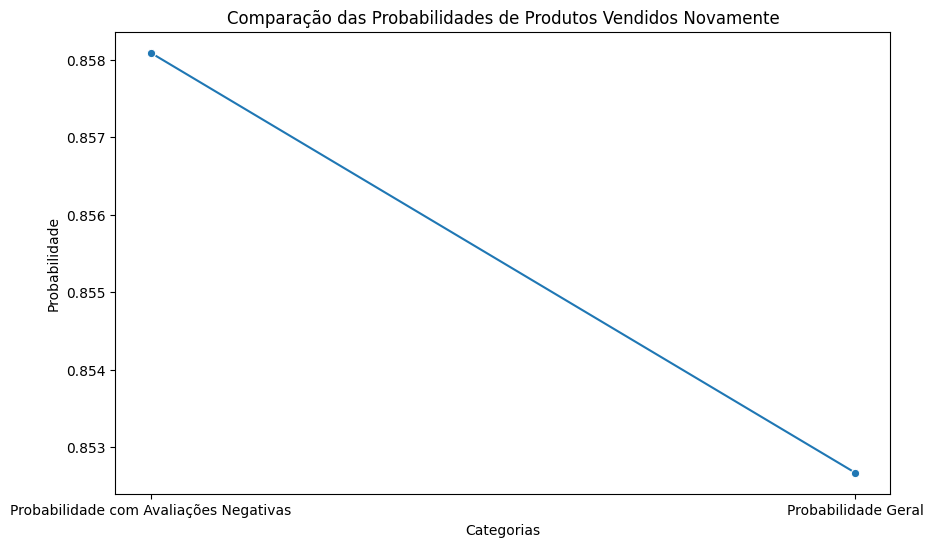

In [99]:
# Configurar o gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(x=tipos, y=probabilidade, marker='o')
sns.color_palette()

# Adicionar títulos e rótulos
plt.title('Comparação das Probabilidades de Produtos Vendidos Novamente')
plt.xlabel('Categorias')
plt.ylabel('Probabilidade')

# Mostrar o gráfico
plt.show()

In [104]:
# Exportando a base final
dados_juntos.to_csv('final_avaliacoes.csv', index=False)